# Alanine Dipeptide

This example we study the Alanine Dipeptide molecule. Alanine Dipeptide is an example for a small peptide exhibiting rare-events in solution at room temperature. The ϕ and ψ dihedral angles of the molecule have been identified as the two relevant coordinates for the slowest kinetic processes of the system under equilibrium conditions.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import folie as fl

import mdshare  # for trajectory data

Obtain the data via mdshare (thanks for the  Computational Molecular Biology Group, Freie Universität Berlin (GER) providing the data):

In [6]:
dihedral_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-backbone-dihedrals.npz", working_directory="data"
)
with np.load(dihedral_file) as fh:
    dihedral = [fh[f"arr_{i}"] for i in range(3)]



Since the dynamics of the molecule are completely described by its position in the dihedral plane, we can use these two variables to visualize the state population.

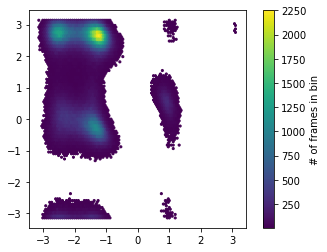

In [7]:
f, ax = plt.subplots(1, 1)
hb = ax.hexbin(*np.concatenate(dihedral).T, mincnt=5)
ax.set_aspect('equal')
cb = f.colorbar(hb, ax=ax)
cb.set_label('# of frames in bin')

In [13]:
data = fl.Trajectories(dt=1.0) # Timestep is 1ps
for trj in dihedral:
    print(trj.shape)
    data.append(trj)
print(data)

(250000, 2)
(250000, 2)
(250000, 2)
Trajectory of length 250000 and dimension 2.
Trajectory of length 250000 and dimension 2.
Trajectory of length 250000 and dimension 2.



We are going to use finite elements for building a 2D model